# 3. COVID Data Visualization

In the previous section, we predocued the visuals for the raw COVID data. Here, we will visualize the number of deaths per 100,000 to compare the COVID deaths in different groups.

## 3-1. Import the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 3-2. Load the dataset

In [2]:
data = pd.read_csv('data/race-census.csv')

In [3]:
data

,Race,Percentage,People
0,White,61.4,197277789
1,Black,12.3,39445495
2,Hispanic,17.6,56510571
3,Asian,5.3,16989540
4,AIAN,0.7,2098763
5,NHPI,0.2,515522
6,Other,2.5,8166727


Now we will get the COVID data

In [4]:
df = pd.read_csv('data/Race-COVID.csv')

total = np.sum(df['Deaths_Total'])
white = np.sum(df['Deaths_White'])
black = np.sum(df['Deaths_Black'])
latin = np.sum(df['Deaths_LatinX'])
asian = np.sum(df['Deaths_Asian'])
aian = np.sum(df['Deaths_AIAN'])
nhpi = np.sum(df['Deaths_NHPI'])
unknown = np.sum(df['Deaths_Unknown'])
other = total - (white + black + latin + asian + aian + nhpi + unknown)

case = np.array([white, black, latin, asian, aian, nhpi, other])

In [5]:
case

array([70326., 30648., 23206.,  5510.,  1071.,   168.,  5005.])

Here, case is a list of deaths separated by race/ethnicity. We will include it to our original dataframe.

In [6]:
data['COVID'] = case

In [7]:
data

,Race,Percentage,People,COVID
0,White,61.4,197277789,70326.0
1,Black,12.3,39445495,30648.0
2,Hispanic,17.6,56510571,23206.0
3,Asian,5.3,16989540,5510.0
4,AIAN,0.7,2098763,1071.0
5,NHPI,0.2,515522,168.0
6,Other,2.5,8166727,5005.0


## 3-3. Data Preparation

As a next step, divide COVID by people to get proportion of COVID deaths per person.

In [8]:
data['Percentage'] = data['COVID'] / data['People']

In [9]:
data

,Race,Percentage,People,COVID
0,White,0.000356,197277789,70326.0
1,Black,0.000777,39445495,30648.0
2,Hispanic,0.000411,56510571,23206.0
3,Asian,0.000324,16989540,5510.0
4,AIAN,0.000510,2098763,1071.0
5,NHPI,0.000326,515522,168.0
6,Other,0.000613,8166727,5005.0


These percentages are really small and it might be difficult to get an intuition of these numbers. It might be better to multiply these numbers by 100,000 to get number of deaths per 100,000 people.

In [10]:
data['Per100,000'] = data['Percentage'] * 100000

In [11]:
data

,Race,Percentage,People,COVID,"Per100,000"
0,White,0.000356,197277789,70326.0,35.648210
1,Black,0.000777,39445495,30648.0,77.697086
2,Hispanic,0.000411,56510571,23206.0,41.064883
3,Asian,0.000324,16989540,5510.0,32.431720
4,AIAN,0.000510,2098763,1071.0,51.030059
5,NHPI,0.000326,515522,168.0,32.588328
6,Other,0.000613,8166727,5005.0,61.285262


## 3-4. Data Visualization

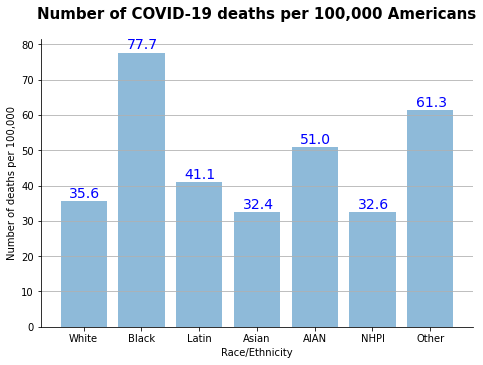

In [12]:
case = data['Per100,000']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['White','Black','Latin','Asian','AIAN','NHPI','Other']
location = [1,2,3,4,5,6,7,8]
ax.bar(label, case, alpha=0.5)
ax.set_ylabel('Number of deaths per 100,000')
ax.set_xlabel('Race/Ethnicity')
#ax.set_ylim(0,78000)
ax.set_title('Number of COVID-19 deaths per 100,000 Americans', fontweight="bold", fontsize=15, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for a,b in zip(location, np.round(case, decimals=1)):
    plt.text(a-1.25, b+1, str(b), color='b', size=14)
    
plt.grid(axis='y')

plt.show()

It seems that white people are less likely to die compared to other groups. As a next step, I will divide the mortality rate for all the groups by the mortality rate for white people to get the relative size for each groups.

In [16]:
# Extract white data
white = data['Percentage'][0]

In [17]:
data['Relative'] = data['Percentage'] / white

In [18]:
data

,Race,Percentage,People,COVID,"Per100,000",Relative
0,White,0.000356,197277789,70326.0,35.648210,1.000000
1,Black,0.000777,39445495,30648.0,77.697086,2.179551
2,Hispanic,0.000411,56510571,23206.0,41.064883,1.151948
3,Asian,0.000324,16989540,5510.0,32.431720,0.909771
4,AIAN,0.000510,2098763,1071.0,51.030059,1.431490
5,NHPI,0.000326,515522,168.0,32.588328,0.914165
6,Other,0.000613,8166727,5005.0,61.285262,1.719168


In [22]:
# Exclude 'Other' from the plot
freq = data['Relative'][0:6]

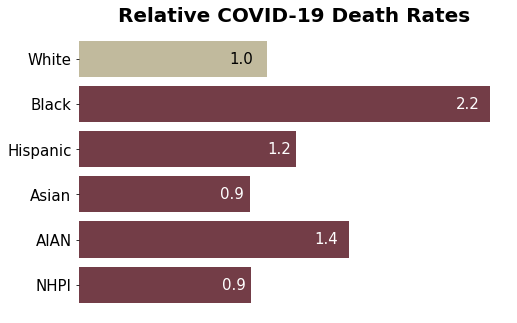

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['White','Black','Hispanic','Asian','AIAN','NHPI']


ax.barh(label, freq,color=('#c1ba9d','#733d47','#733d47','#733d47','#733d47','#733d47'))
ax.invert_yaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.set_yticklabels(label, size=15)
ax.set_title('Relative COVID-19 Death Rates', fontweight="bold", fontsize=20)

plt.text(0.8,0,'1.0',color='black',va="center",size=15)
plt.text(2,1,'2.2',color='white',va="center",size=15)
plt.text(1,2,'1.2',color='white',va="center",size=15)
plt.text(0.75,3,'0.9',color='white',va="center",size=15)
plt.text(1.25,4,'1.4',color='white',va="center",size=15)
plt.text(0.76,5,'0.9',color='white',va="center",size=15)

plt.show()

As a next step, we will plot how the deaths of different race groups changed with time.

In [46]:
data = pd.read_csv('data/race-date.csv')

In [47]:
data

,Date,Indigenous,Pacific Islander,Black,Latino,White,Asian
0,13-Apr,NaN,NaN,14.0,3.8,4.7,3.5
1,16-Apr,NaN,NaN,14.2,4.7,4.0,5.1
2,20-Apr,NaN,NaN,23.1,9.3,8.6,7.9
3,23-Apr,NaN,NaN,25.5,10.6,9.4,10.1
4,27-Apr,NaN,NaN,28.4,11.3,10.7,11.0
5,30-Apr,NaN,NaN,34.7,14.9,13.1,14.6
6,4-May,NaN,NaN,37.2,15.9,14.3,16.0
7,7-May,NaN,NaN,40.9,17.9,15.8,17.9
8,11-May,NaN,NaN,42.8,19.1,16.6,18.4
9,19-May,NaN,NaN,50.3,22.9,20.7,22.7


C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Second argument 'White' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  after removing the cwd from sys.path.
C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'Black' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  """


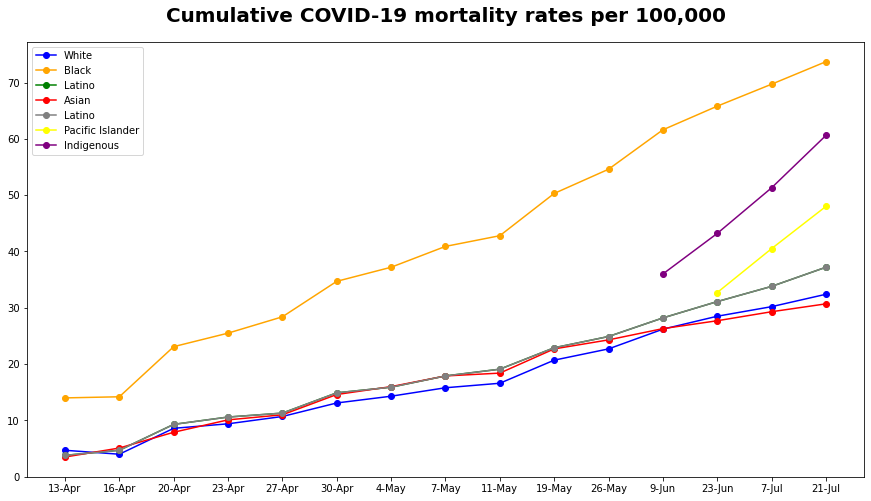

In [64]:
# multiple line plot
plt.figure(figsize=(15,8))
plt.title('Cumulative COVID-19 mortality rates per 100,000', weight="bold", fontsize=20, pad=20)
plt.plot('Date', 'White', data=data, marker='o',color='blue')
plt.plot('Date', 'Black', data=data, marker='o', color='orange')
plt.plot('Date', 'Latino', data=data, marker='o', color='green')
plt.plot('Date', 'Asian', data=data, marker='o', color='red')
plt.plot('Date', 'Latino', data=data, marker='o', color='grey')
plt.plot('Date','Pacific Islander', data=data, marker='o', color='yellow')
plt.plot('Date','Indigenous', data=data, marker='o', color='purple')
plt.legend()
plt.show()

## Conclusion

By observing the relative COVID-19 death cases, black people are 2.2 times more likely to die compared to white people, and the line graph suggests that the mortality rates of black people are increasing at a faster speed. However, this difference can be caused by chance, so we should conduct a hypothesis test to make conclusions from data. We will be examining this data in detail in "Categorical data analysis" and "Regression analysis" sections.

## Things to consider:

1. Confounding factor

We should examine other factors that might affect COVID-19 cases, such as age group and socioeconomic factors, as race might not be the only reason behind the differences.

2. Hypothesis testing

We should always conduct a hypothesis test before making conclusions about the data.